# Linear Regression Non Linear Feature

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
np.random.seed(10)

In [4]:
def generate_data():
    nsamples = 100
    x = np.random.rand(nsamples)
    noise = np.random.uniform(0.01, 0.08, nsamples)
    y = 2 * (x-0.5)**2 + 0.2 + noise
    train_x, y_train = (x[:60]-0.5)**2, y[:60]
    test_x, y_test = (x[60:]-0.5)**2, y[60:]
    return x, y, train_x, y_train, test_x, y_test

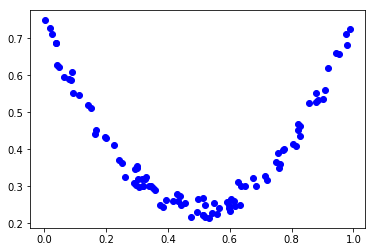

In [5]:
x, y, train_x, y_train, test_x, y_test = generate_data()
plt.plot(x, y, 'bo')

In [6]:
x[0]**2 == train_x[0]
#print(x[0]**2)
#print(train_x[0])

False

In [7]:
x, y, train_x, y_train, test_x, y_test = generate_data()
train_x = np.stack([np.ones(train_x.shape[0]), train_x], axis=1)
test_x = np.stack([np.ones(test_x.shape[0]), test_x], axis=1)
print("shape of training data", train_x.shape)
print("shape of training label", y_train.shape)
print("shape of test data", test_x.shape)
print("shape of test label", y_test.shape)

shape of training data (60, 2)
shape of training label (60,)
shape of test data (40, 2)
shape of test label (40,)


In [8]:
weight = np.random.uniform(size=2)
print("initial weight %s" %weight)

initial weight [0.23671088 0.7731156 ]


In [9]:
# Find optimal weights using Gradient Descent
step_size = 0.1
m = train_x.shape[0]

for epoch in range(1000):
    # batch gradient descent
    err = y_train - np.dot(weight,train_x.T)
    deltaJ = -2*np.dot(err,train_x)/m
    #print(deltaJ)
    # update weight
    weight = weight - step_size*deltaJ

# print weights
print(weight)

[0.2846296  1.51613817]


In [10]:
# prediction on test data
y_pred = np.dot(weight, test_x.T)

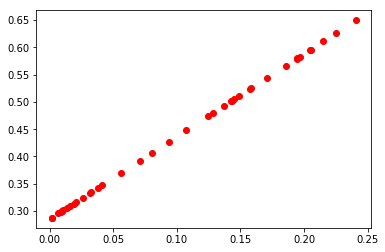

In [11]:
#ax1 = plt.plot(x, y, 'bo')
#plt.plot(x, y, 'bo')
plt.plot(test_x[:,1], y_pred, 'ro')

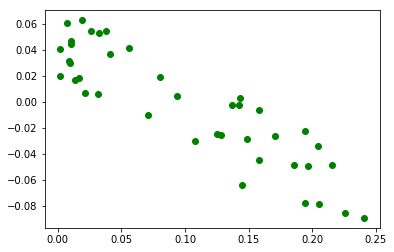

In [12]:
# residue plot
residue = y_pred - y_test
plt.plot(test_x[:, 1], residue, 'go')

In [13]:
residue.mean()

-0.0037432199525802234

In [14]:
residue[0]

0.04141943465035336

In [15]:
residue[8]

-0.025257394028918356